In [25]:
import os
import MDAnalysis as mda
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

# Parameters

In [26]:
ac = 120
dh = 1
da = 3
PEG = "type 4"
H2O = "type 2"

In [27]:
conf = "pullonPEG/pull.data"
traj = "pullonPEG/traj.xtc"
v = mda.Universe(conf, traj)
#v.transfer_to_memory()
hbds_type1_f10 = HBA(universe=v,
                hydrogens_sel=H2O,
                acceptors_sel=PEG,
                d_h_cutoff = dh, 
                d_a_cutoff = da, 
                d_h_a_angle_cutoff = ac).run()
result_hbds_type1_f10 = hbds_type1_f10.results.hbonds

In [28]:
nb_bond = 0
nb_bridge = 0
all_bridge = []
all_bond = []
for t in np.unique(result_hbds_type1_f10.T[0]):
    frame_hbds_f10 = result_hbds_type1_f10[result_hbds_type1_f10.T[0] == t]
    donnor = frame_hbds_f10.T[1]
    hydrogen = frame_hbds_f10.T[2]
    acceptor = frame_hbds_f10.T[3]
        
    bridge_per_frame = 0
    for mydonnor in np.unique(donnor):
        occurence = np.sum(donnor == mydonnor)
        list_donnor = donnor[donnor == mydonnor]
        list_hydrogen = hydrogen[donnor == mydonnor]
        list_acceptor = acceptor[donnor == mydonnor]
        
        nb_bond += len(list_donnor)
        if len(np.unique(list_hydrogen)) == 2:
            nb_bridge += 1
            bridge_per_frame += 1
    all_bridge.append(bridge_per_frame)
    all_bond.append(len(frame_hbds_f10))
print("Number of HB = " + str(nb_bond))
print("Number of bridge = " + str(nb_bridge * 2))

Number of HB = 29770
Number of bridge = 6316


In [31]:
list_hydrogen

array([725.])

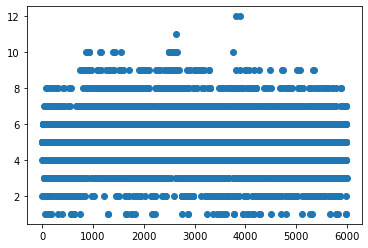

In [30]:
plt.plot(all_bond, 'o')